In [1]:
pip install seaborn --upgrade



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.26.4



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install matplotlib-venn



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np
import seaborn as sns
from itertools import combinations

# Load the data
customers = pd.read_csv('customer_segmentation.csv', sep=',')
customers.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#Viewnumberof samplesandattributetypes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# View missing values
customers.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# View five-number summary for each numerical attribute
customers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
pip install numpy==1.26.4



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
numerical_features = customers.select_dtypes(include=[np.number]).columns
print("Numerical features:", list(numerical_features))
print("Number of numerical features:", len(numerical_features))


Numerical features: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Number of numerical features: 26


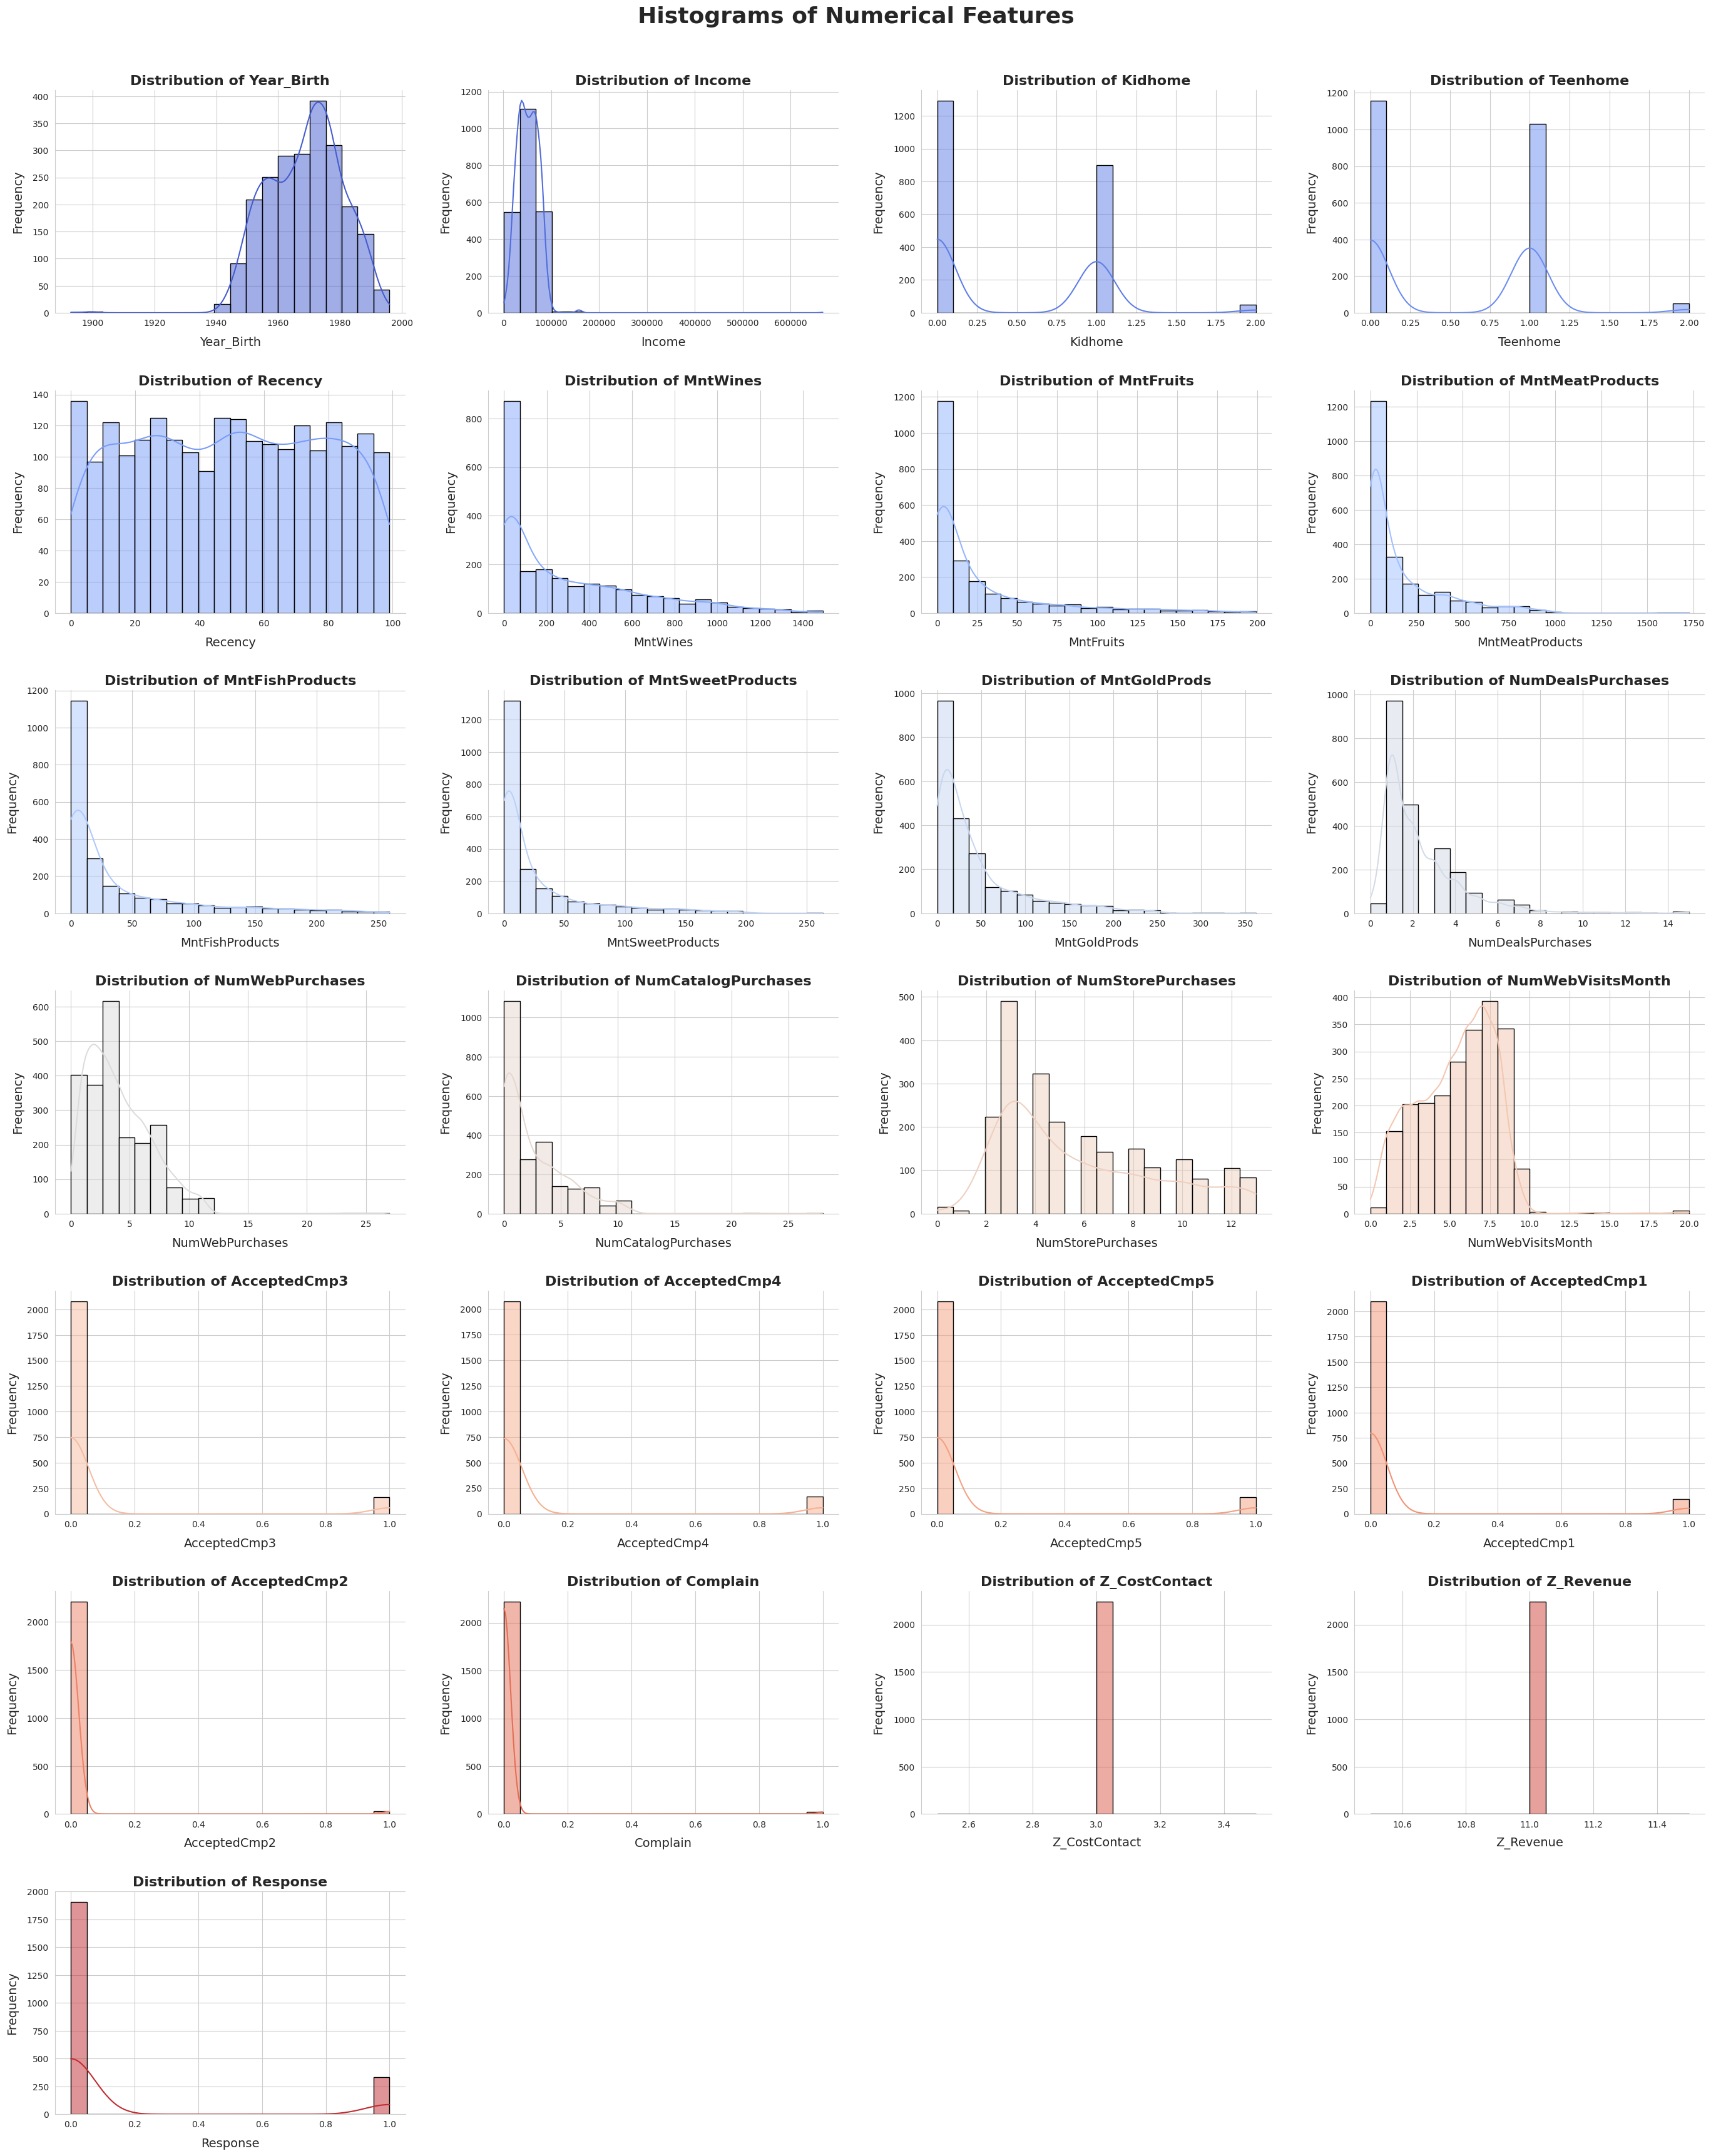

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# %matplotlib inline  # Uncomment if using Jupyter Notebook
sns.set_style("whitegrid")

# Remove 'ID' if not useful
numerical_features = customers.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numerical_features:
    numerical_features.remove('ID')

# Setup color palette
color_palette = sns.color_palette("coolwarm", n_colors=len(numerical_features))

# Grid setup
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(28, 34))
axs = axs.flatten()

# Plot histograms
for i, feature in enumerate(numerical_features):
    try:
        sns.histplot(customers[feature].dropna(), bins=20, kde=True, color=color_palette[i],
                     ax=axs[i], edgecolor='black')
        axs[i].set_title(f'Distribution of {feature}', fontsize=16, weight='bold')
        axs[i].set_xlabel(f'{feature}', fontsize=14, labelpad=10)
        axs[i].set_ylabel('Frequency', fontsize=14, labelpad=10)
        axs[i].grid(True)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
    except Exception as e:
        print(f"Skipping {feature} due to error: {e}")
        axs[i].axis('off')

# Remove empty axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Layout adjustments
plt.tight_layout(pad=3.0)  # ✅ Fixed for compatibility with matplotlib
plt.suptitle('Histograms of Numerical Features', fontsize=26, weight='bold', y=1.02)
plt.show()


Five-number summary for 'ID':
min        0.00
25%     2828.25
50%     5458.50
75%     8427.75
max    11191.00
Name: ID, dtype: float64


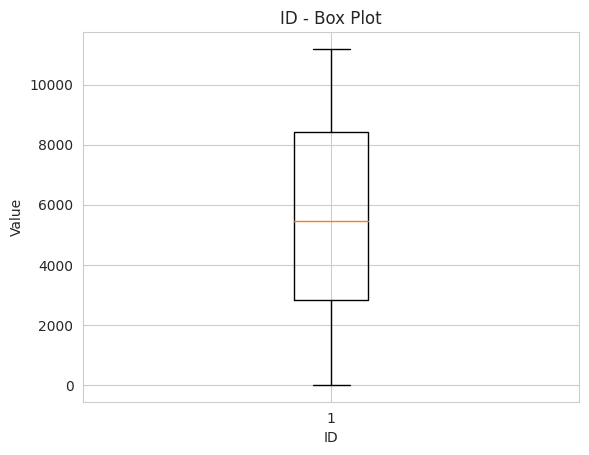

In [11]:
def show_summary(attribute):
    attribute_data = customers[attribute]
    
    # Print five-number summary
    print(f"Five-number summary for '{attribute}':")
    print(attribute_data.describe().loc[['min', '25%', '50%', '75%', 'max']])
    
    # Plot boxplot
    plt.boxplot(attribute_data.dropna())  # dropna avoids issues with NaNs
    plt.title(f"{attribute} - Box Plot")
    plt.xlabel(attribute)
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

# Call the function outside the definition
show_summary('ID')  # Or try 'Income', 'MntWines', etc.


Five-number summary for 'Year_Birth':
min    1893.0
25%    1959.0
50%    1970.0
75%    1977.0
max    1996.0
Name: Year_Birth, dtype: float64


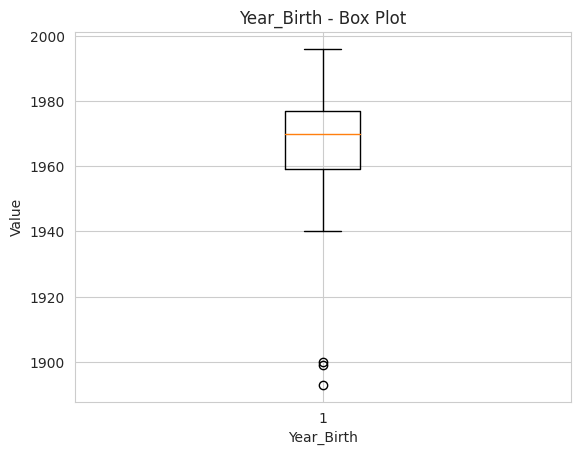

In [12]:
show_summary('Year_Birth')

In [13]:
customers['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
customers['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Five-number summary for 'Income':
min      1730.0
25%     35303.0
50%     51381.5
75%     68522.0
max    666666.0
Name: Income, dtype: float64


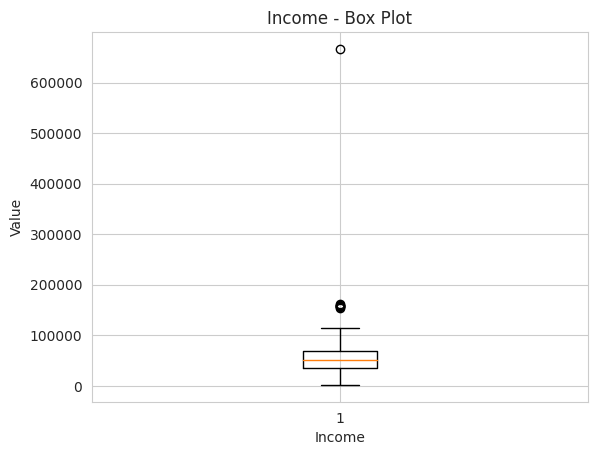

In [15]:
show_summary('Income')

Five-number summary for 'Kidhome':
min    0.0
25%    0.0
50%    0.0
75%    1.0
max    2.0
Name: Kidhome, dtype: float64


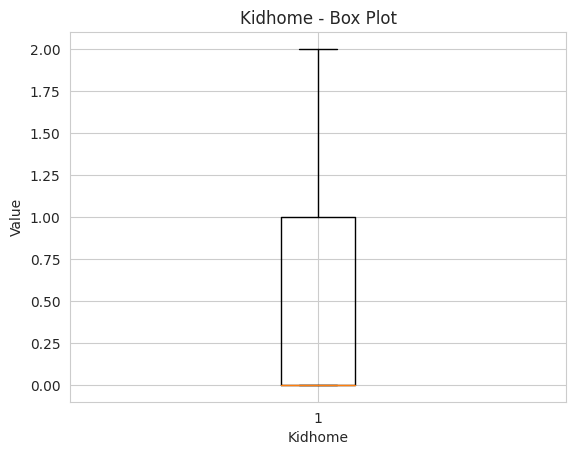

In [16]:
show_summary('Kidhome')

Five-number summary for 'Teenhome':
min    0.0
25%    0.0
50%    0.0
75%    1.0
max    2.0
Name: Teenhome, dtype: float64


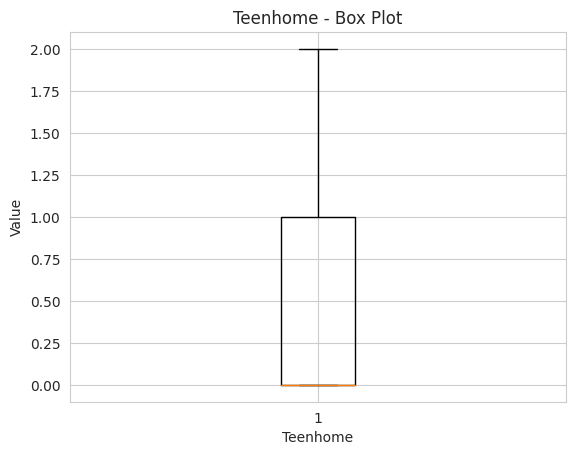

In [17]:
show_summary('Teenhome')

In [18]:
customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'], format='%d-%m-%Y')


Five-number summary for 'Recency':
min     0.0
25%    24.0
50%    49.0
75%    74.0
max    99.0
Name: Recency, dtype: float64


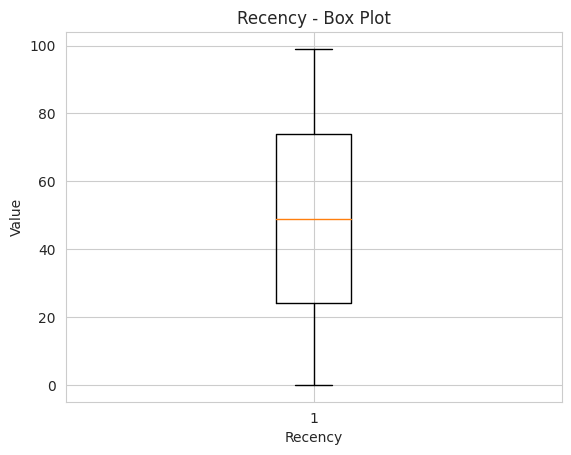

In [19]:
show_summary('Recency')

Five-number summary for 'MntWines':
min       0.00
25%      23.75
50%     173.50
75%     504.25
max    1493.00
Name: MntWines, dtype: float64


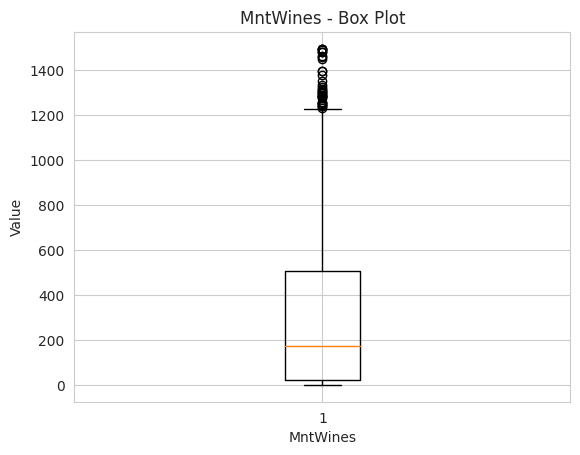

In [20]:
show_summary('MntWines')

Five-number summary for 'MntFruits':
min      0.0
25%      1.0
50%      8.0
75%     33.0
max    199.0
Name: MntFruits, dtype: float64


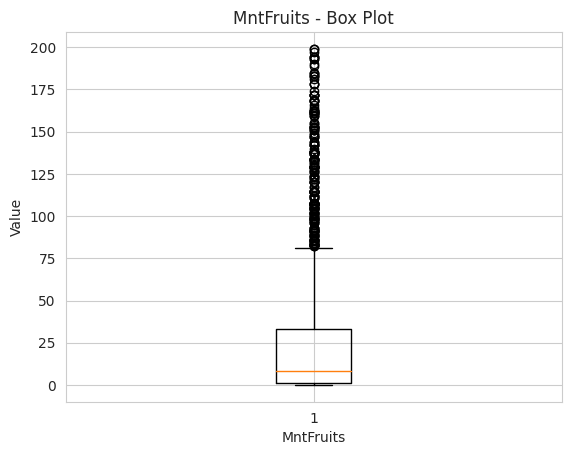

In [21]:
show_summary('MntFruits')

Five-number summary for 'MntMeatProducts':
min       0.0
25%      16.0
50%      67.0
75%     232.0
max    1725.0
Name: MntMeatProducts, dtype: float64


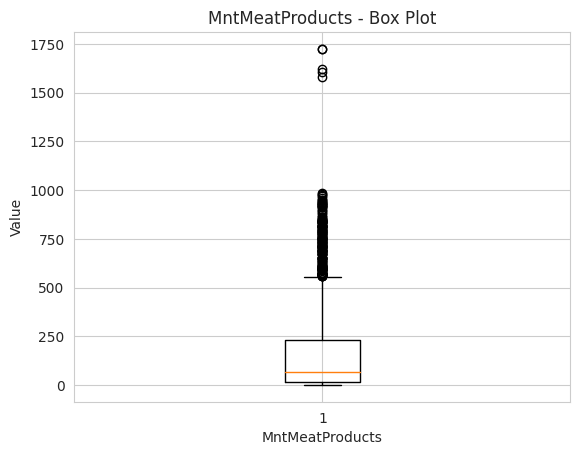

In [22]:
show_summary('MntMeatProducts')

Five-number summary for 'MntFishProducts':
min      0.0
25%      3.0
50%     12.0
75%     50.0
max    259.0
Name: MntFishProducts, dtype: float64


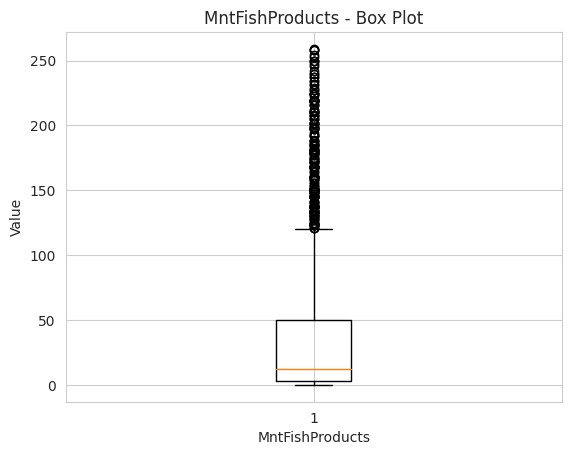

In [23]:
show_summary('MntFishProducts')

Five-number summary for 'MntSweetProducts':
min      0.0
25%      1.0
50%      8.0
75%     33.0
max    263.0
Name: MntSweetProducts, dtype: float64


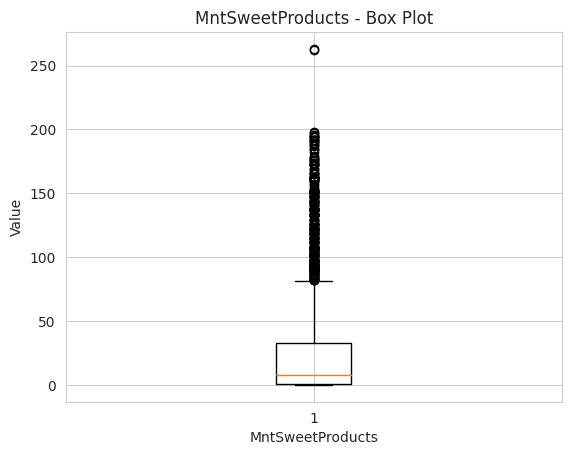

In [24]:
show_summary('MntSweetProducts')

Five-number summary for 'MntGoldProds':
min      0.0
25%      9.0
50%     24.0
75%     56.0
max    362.0
Name: MntGoldProds, dtype: float64


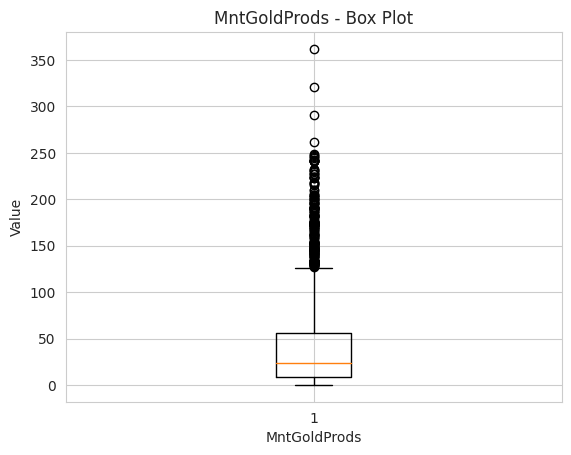

In [25]:
show_summary('MntGoldProds')

Five-number summary for 'NumDealsPurchases':
min     0.0
25%     1.0
50%     2.0
75%     3.0
max    15.0
Name: NumDealsPurchases, dtype: float64


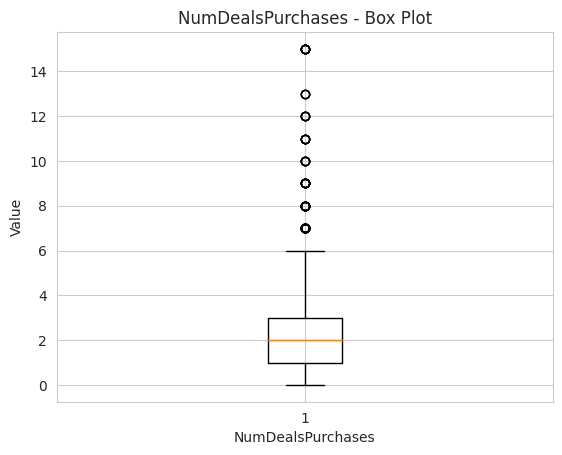

In [26]:
show_summary('NumDealsPurchases')

Five-number summary for 'NumWebPurchases':
min     0.0
25%     2.0
50%     4.0
75%     6.0
max    27.0
Name: NumWebPurchases, dtype: float64


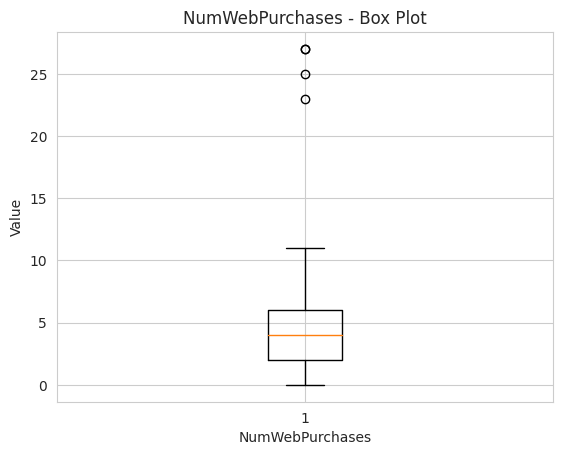

In [27]:
show_summary('NumWebPurchases')

Five-number summary for 'NumCatalogPurchases':
min     0.0
25%     0.0
50%     2.0
75%     4.0
max    28.0
Name: NumCatalogPurchases, dtype: float64


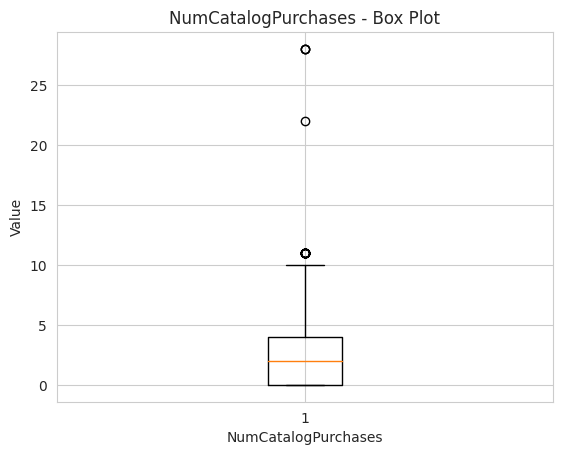

In [28]:
show_summary('NumCatalogPurchases')

Five-number summary for 'NumStorePurchases':
min     0.0
25%     3.0
50%     5.0
75%     8.0
max    13.0
Name: NumStorePurchases, dtype: float64


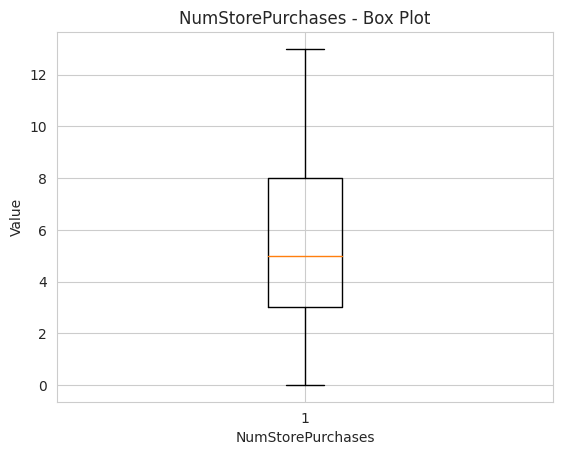

In [29]:
show_summary('NumStorePurchases')

Five-number summary for 'NumWebVisitsMonth':
min     0.0
25%     3.0
50%     6.0
75%     7.0
max    20.0
Name: NumWebVisitsMonth, dtype: float64


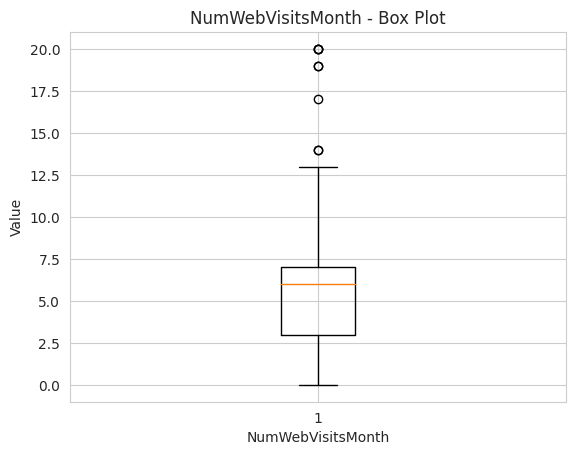

In [30]:
show_summary('NumWebVisitsMonth')

In [31]:
customers['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [32]:
customers['AcceptedCmp4'].value_counts()

AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

In [33]:
customers['AcceptedCmp5'].value_counts()

AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

In [34]:
customers['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

In [35]:
customers['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [36]:
customers['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

Only 1 value present in Z_CostContact
3    2240
Name: count, dtype: int64
Five-number summary for 'Z_CostContact':
min    3.0
25%    3.0
50%    3.0
75%    3.0
max    3.0
Name: Z_CostContact, dtype: float64


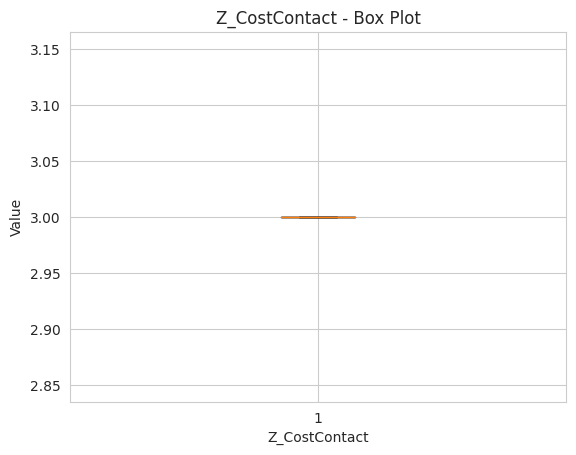

In [37]:
print('Only 1 value present in', customers['Z_CostContact'].value_counts())
show_summary('Z_CostContact')

Only 1 value present in Z_Revenue
11    2240
Name: count, dtype: int64
Five-number summary for 'Z_Revenue':
min    11.0
25%    11.0
50%    11.0
75%    11.0
max    11.0
Name: Z_Revenue, dtype: float64


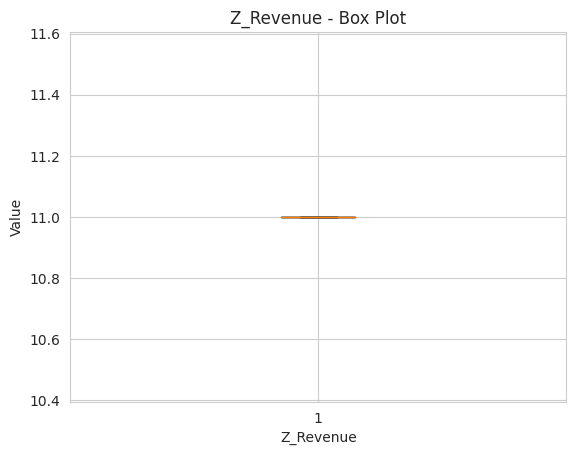

In [38]:
print('Only 1 value present in', customers['Z_Revenue'].value_counts())
show_summary('Z_Revenue')

In [39]:
customers['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [40]:
# Drop missing values since they only roughly 1% of the dataset
dataset = customers.dropna()
dataset.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [41]:
# Drop ID, Z_CostContact and Z_Revenue
customers = customers.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

In [42]:
# Calculate how long each customer has been enrolled (in days)
customers['Enrolment_Age'] = (pd.Timestamp('today') - customers['Dt_Customer']).dt.days

# Drop the original date column
customers = customers.drop(columns=['Dt_Customer'])

# Show summary stats
customers['Enrolment_Age'].describe()


count    2240.000000
mean     4308.582143
std       202.122512
min      3955.000000
25%      4135.750000
50%      4310.500000
75%      4484.000000
max      4654.000000
Name: Enrolment_Age, dtype: float64

In [43]:
# Drop records with weird or joke values in marital status
customers = customers[~customers['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Define binary relationship mapping
relationship_mapping = {
    'Married': 1,
    'Together': 1,
    'Single': 0,
    'Divorced': 0,
    'Widow': 0,
    'Alone': 0
}

# Map to a new binary column
customers['In_Relationship'] = customers['Marital_Status'].map(relationship_mapping)

# Drop original column
customers = customers.drop(columns=['Marital_Status'])

# View relationship counts
customers['In_Relationship'].value_counts()


In_Relationship
1    1444
0     792
Name: count, dtype: int64

In [44]:
def delete_outliers(df, column):
    # IQR calculations
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    if num_outliers > 0:
        print(f'{num_outliers} outliers detected in column {column}. Applying capping.')

        # Cap outliers
        df[column] = np.where(df[column] > upper_bound, upper_bound,
                     np.where(df[column] < lower_bound, lower_bound, df[column]))
    
    return df

# List of numerical columns to check
numerical_columns = [
    'Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'Enrolment_Age'
]

# Apply outlier capping to each column
for column in numerical_columns:
    customers = delete_outliers(customers, column)


8 outliers detected in column Income. Applying capping.
3 outliers detected in column Year_Birth. Applying capping.
35 outliers detected in column MntWines. Applying capping.
226 outliers detected in column MntFruits. Applying capping.
175 outliers detected in column MntMeatProducts. Applying capping.
221 outliers detected in column MntFishProducts. Applying capping.
248 outliers detected in column MntSweetProducts. Applying capping.
205 outliers detected in column MntGoldProds. Applying capping.
86 outliers detected in column NumDealsPurchases. Applying capping.
4 outliers detected in column NumWebPurchases. Applying capping.
23 outliers detected in column NumCatalogPurchases. Applying capping.
8 outliers detected in column NumWebVisitsMonth. Applying capping.


In [45]:
customers.head(3)


,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Enrolment_Age,In_Relationship
0,1957.0,Graduation,58138.0,0,0,58,635.0,81.0,546.0,120.5,...,7.0,0,0,0,0,0,0,1,4618,0
1,1954.0,Graduation,46344.0,1,1,38,11.0,1.0,6.0,2.0,...,5.0,0,0,0,0,0,0,0,4068,0
2,1965.0,Graduation,71613.0,0,0,26,426.0,49.0,127.0,111.0,...,4.0,0,0,0,0,0,0,0,4267,1


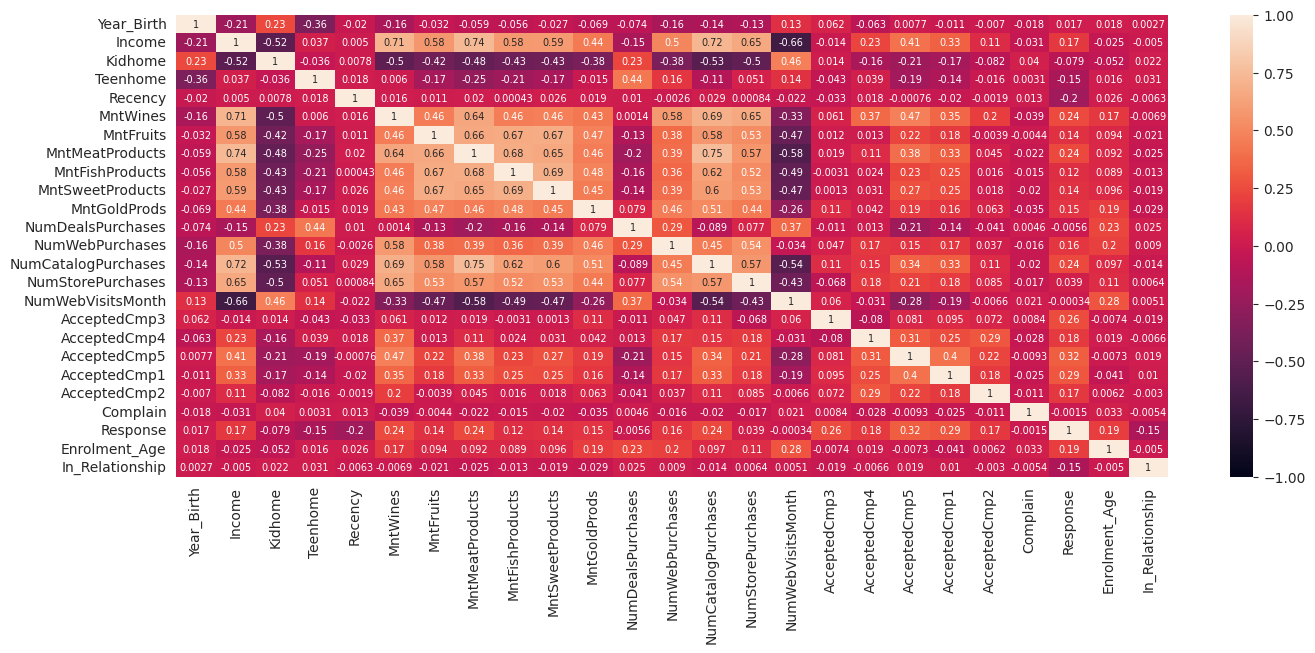

In [46]:
corr = customers.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, annot_kws={"size": 7})
plt.show()

/tmp/ipykernel_53557/1823659131.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


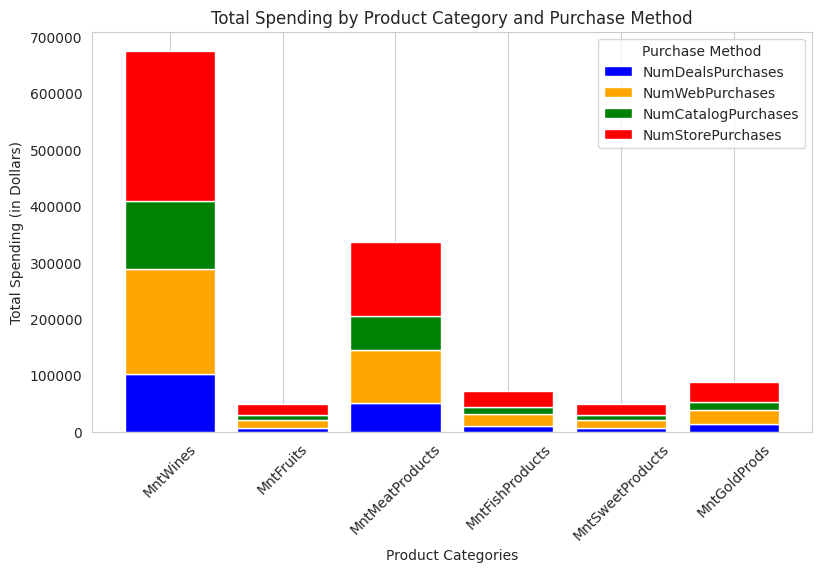

In [47]:


# Define product categories and purchase methods
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

purchase_methods = ['NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases']

# Calculate total spending and total purchases
total_spending_by_category = customers[spending_categories].sum()
total_purchases_by_method = customers[purchase_methods].sum()

# Calculate percentage of purchases per method
purchase_method_percentage = total_purchases_by_method / total_purchases_by_method.sum()

# Distribute spending based on purchase method percentages
spending_distribution = total_spending_by_category.values[:, np.newaxis] * purchase_method_percentage.values

# Set up figure
fig = plt.figure(figsize=(9, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Define colors
colors = ['blue', 'orange', 'green', 'red']

# Initialize base for stacking
bottom = np.zeros(len(spending_distribution))

# Plot stacked bars
for i, method in enumerate(purchase_methods):
    ax.bar(total_spending_by_category.index,
           spending_distribution[:, i],
           bottom=bottom,
           color=colors[i],
           width=0.8,
           label=method)
    bottom += spending_distribution[:, i]

# Add labels, title, and legend
ax.set_title('Total Spending by Product Category and Purchase Method')
ax.set_xlabel('Product Categories')
ax.set_ylabel('Total Spending (in Dollars)')
ax.set_xticks(np.arange(len(total_spending_by_category.index)))
ax.set_xticklabels(total_spending_by_category.index, rotation=45)
ax.grid(axis='y')
ax.legend(title='Purchase Method')

# Show the plot
plt.tight_layout()
plt.show()


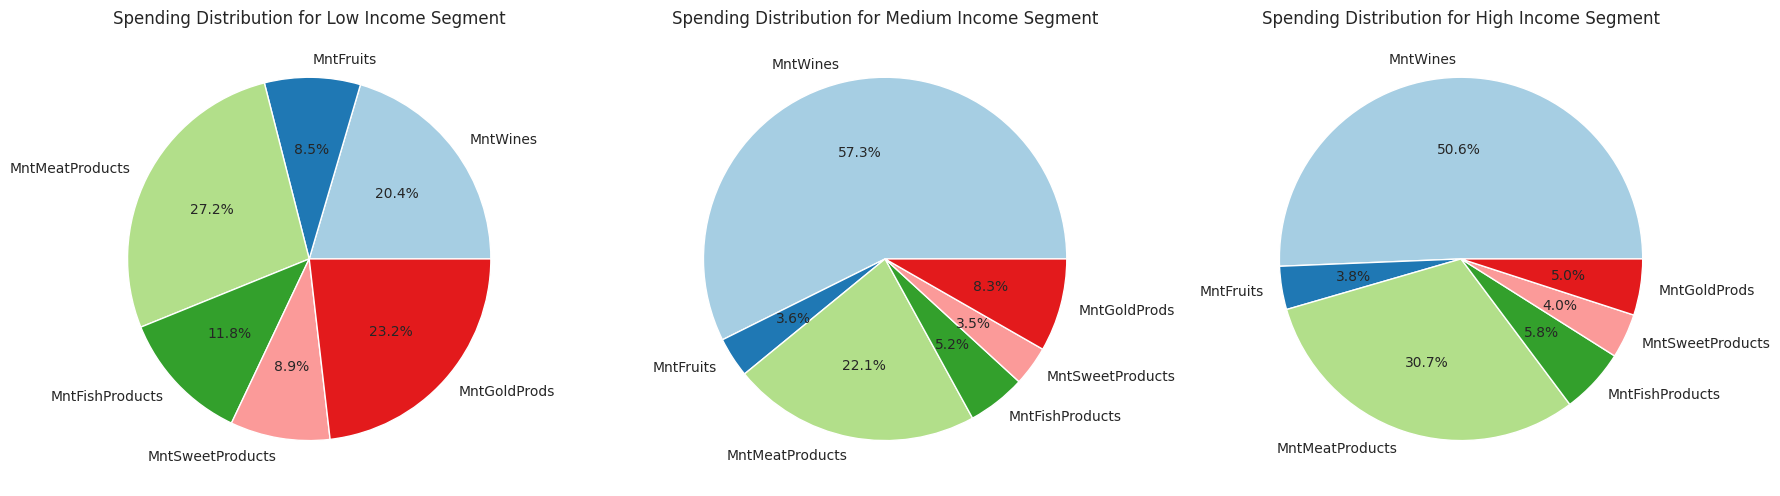

In [48]:
import matplotlib.pyplot as plt

# Define income segments
income_bins = [0, 30000, 70000, customers['Income'].max()]
income_labels = ['Low Income', 'Medium Income', 'High Income']
customers['Income_Segment'] = pd.cut(customers['Income'],
                                      bins=income_bins,
                                      labels=income_labels,
                                      include_lowest=True)

# Define product spending categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending by segment
segment_spending = customers.groupby('Income_Segment', observed=True)[spending_categories].sum()

# Plot side-by-side pie charts
plt.figure(figsize=(18, 6))

for i, segment in enumerate(segment_spending.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(segment_spending.loc[segment],
            labels=spending_categories,
            autopct='%1.1f%%',
            colors=plt.cm.Paired.colors)
    plt.title(f'Spending Distribution for {segment} Segment')

plt.tight_layout()
plt.show()


The pie charts above show spending distribution across different income segments for various prod
uct categories.
 Key Insights: 
* Low Income Segment, Up to $30000: Predominantly spends on meat products
 and wines 
* Medium Income Segment, $30001 to $70000: Dominated by wine purchases.
* High Income Segment, Above $70000: Also shows a large share of spending on wines, complemented by
 substantial purchases in meat and fish products

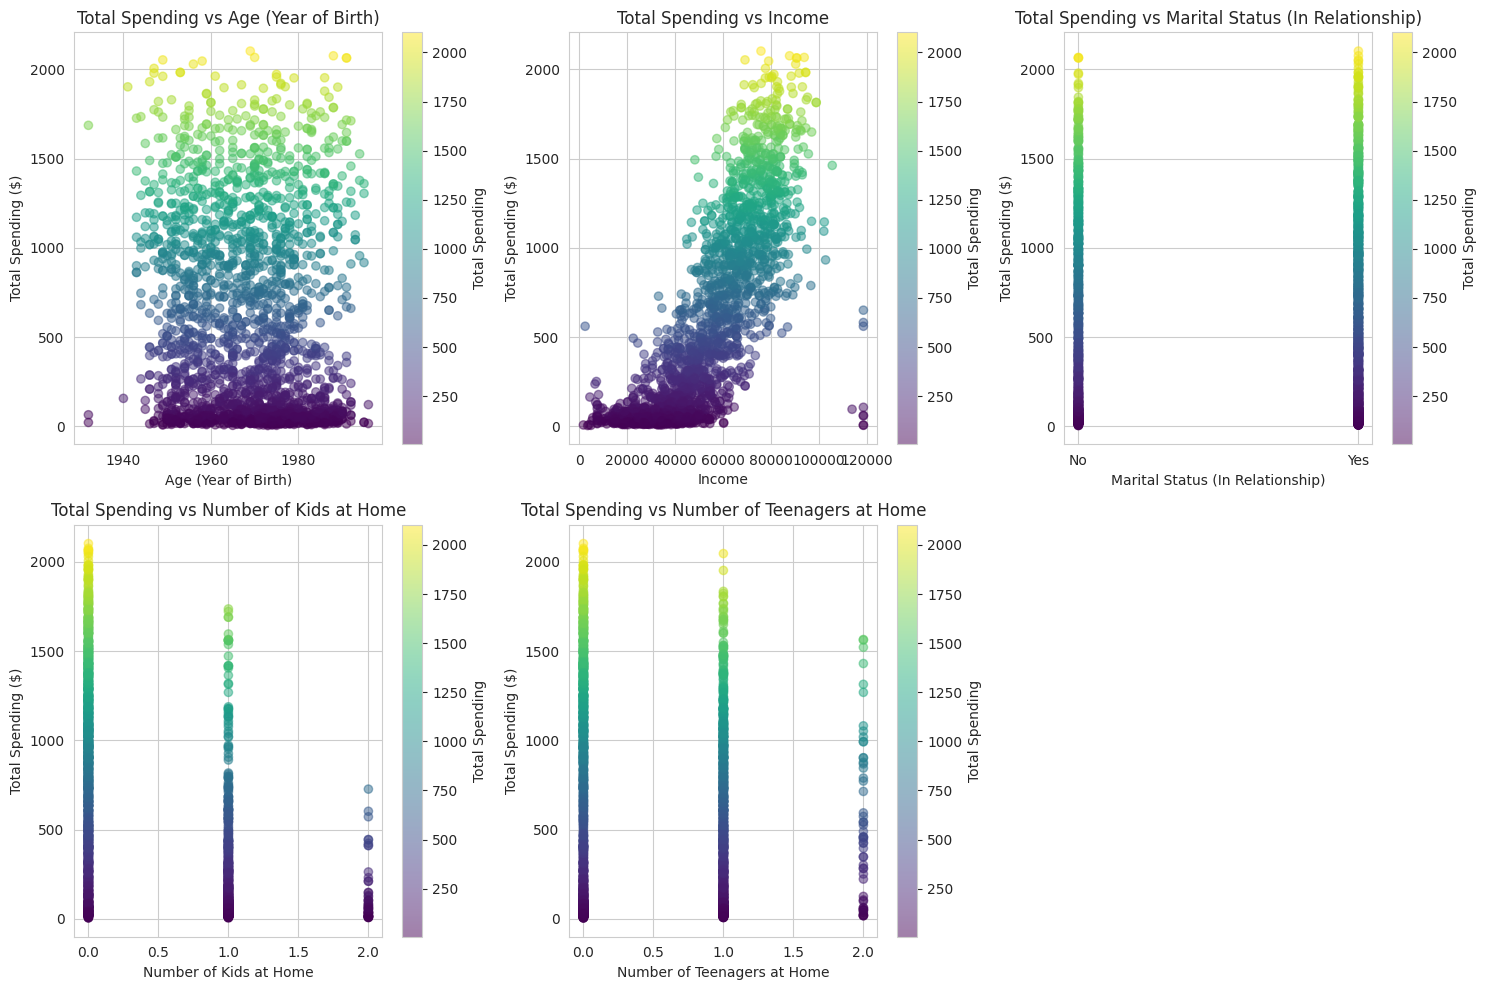

In [49]:
import matplotlib.pyplot as plt

# Define spending categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending per customer
customers['Total_Spending'] = customers[spending_categories].sum(axis=1)

# Define variables to compare with Total Spending
variables = ['Year_Birth', 'Income', 'In_Relationship', 'Kidhome', 'Teenhome']
variable_names = ['Age (Year of Birth)', 'Income', 'Marital Status (In Relationship)',
                  'Number of Kids at Home', 'Number of Teenagers at Home']

# Plot scatter plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    scatter = plt.scatter(customers[var], customers['Total_Spending'],
                          c=customers['Total_Spending'], cmap='viridis', alpha=0.5)
    
    plt.title(f'Total Spending vs {variable_names[i]}')
    plt.xlabel(variable_names[i])
    plt.ylabel('Total Spending ($)')
    plt.grid(True)
    
    # Custom ticks for binary feature
    if var == 'In_Relationship':
        plt.xticks([0, 1], ['No', 'Yes'])

    plt.colorbar(scatter, label='Total Spending')

plt.tight_layout()
plt.show()


 The scatter plots below show total spending vs. various customer attributes to undetstand possible
 correlations.
 Insights: * Age (Year of Birth) vs Total Spending: shows if there’s a trend in spending habits
 across different age groups. The plot shows a wide distribution of spending across all age groups
 with no clear trend indicating that age may not be a strong predictor of spending habits.
 • Income vs Total Spending: there is a visible trend of increasing spending with higher in
comes.This indicates that targeting higher income customers could be beneficial for increasing
 sales, as they tend to spend more
 • Marital Status vs Total Spending: spending appears similar across different marital statuses,
 though singles and married individuals may show slightly higher spending peaks.Marital sta
tus alone may not be a decisive factor in predicting spending, suggesting a need for combined
 demographic strategies in marketing.
 • Number of Kids at Home vs Total Spending: customers with no kids at home tend to have
 higher spending peaks compared to those with one or more kids.This could imply that indi
viduals without children at home have more disposable income, making them prime targets
 for higher-priced products or services.
 • NumberofTeenagersatHomevsTotalSpending: similar to the plot with kids, customers with
 fewer teenagers at home exhibit higher spending.This could imply that individuals strategies
 might focusing on households with fewer teenagers could be benifical potentially because these
 households have less financial strain and more discretionary spending.
 • Education vs Total Spending: higher education levels (e.g., PhD holders) do not necessarily
 correlate with higher spending compared to other education levels. Education level by it
self may not be a reliable indicator of spending potential, suggesting that other factors like
 profession or income level might be more relevant for targeting

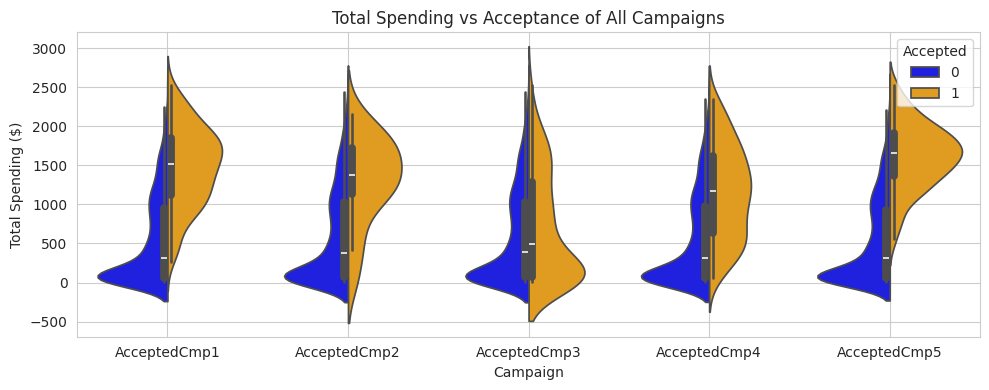

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Spending columns
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create Total_Spending column
customers['Total_Spending'] = customers[spending_categories].sum(axis=1)

# Campaign acceptance columns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Melt the DataFrame for seaborn
melted_data = pd.melt(customers,
                      id_vars=['Total_Spending'],
                      value_vars=campaigns,
                      var_name='Campaign',
                      value_name='Accepted')

# Create violin plot
plt.figure(figsize=(10, 4))
sns.violinplot(x='Campaign',
               y='Total_Spending',
               hue='Accepted',
               data=melted_data,
               split=True,
               palette=['blue', 'orange'])

plt.title('Total Spending vs Acceptance of All Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Total Spending ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


The below Violin Plots show the total amount spent by customers who accepted or did not accept
 marketing campaigns/ 
* X-Axis (Campaign): Represents each of the five marketing campaigns.
* Y-Axis (Total Spending): Total spending across specified categories. 
* Colours: Blue indicates
 customers who did not accept the campaign; orange represents those who accepted. 
* Shape: The shape of the violin indicates the density of data points at different spending levels, with the thicker
 parts of the violin indicating a higher concentration of data points.
 Insights: 
* Customers who accepted the campaigns generally have higher total spending across
 product categories compared to those who didn’t accet the capaign. * The wider sections of the
 orange parts (acceptors) suggest a concentration of customers who spend more.

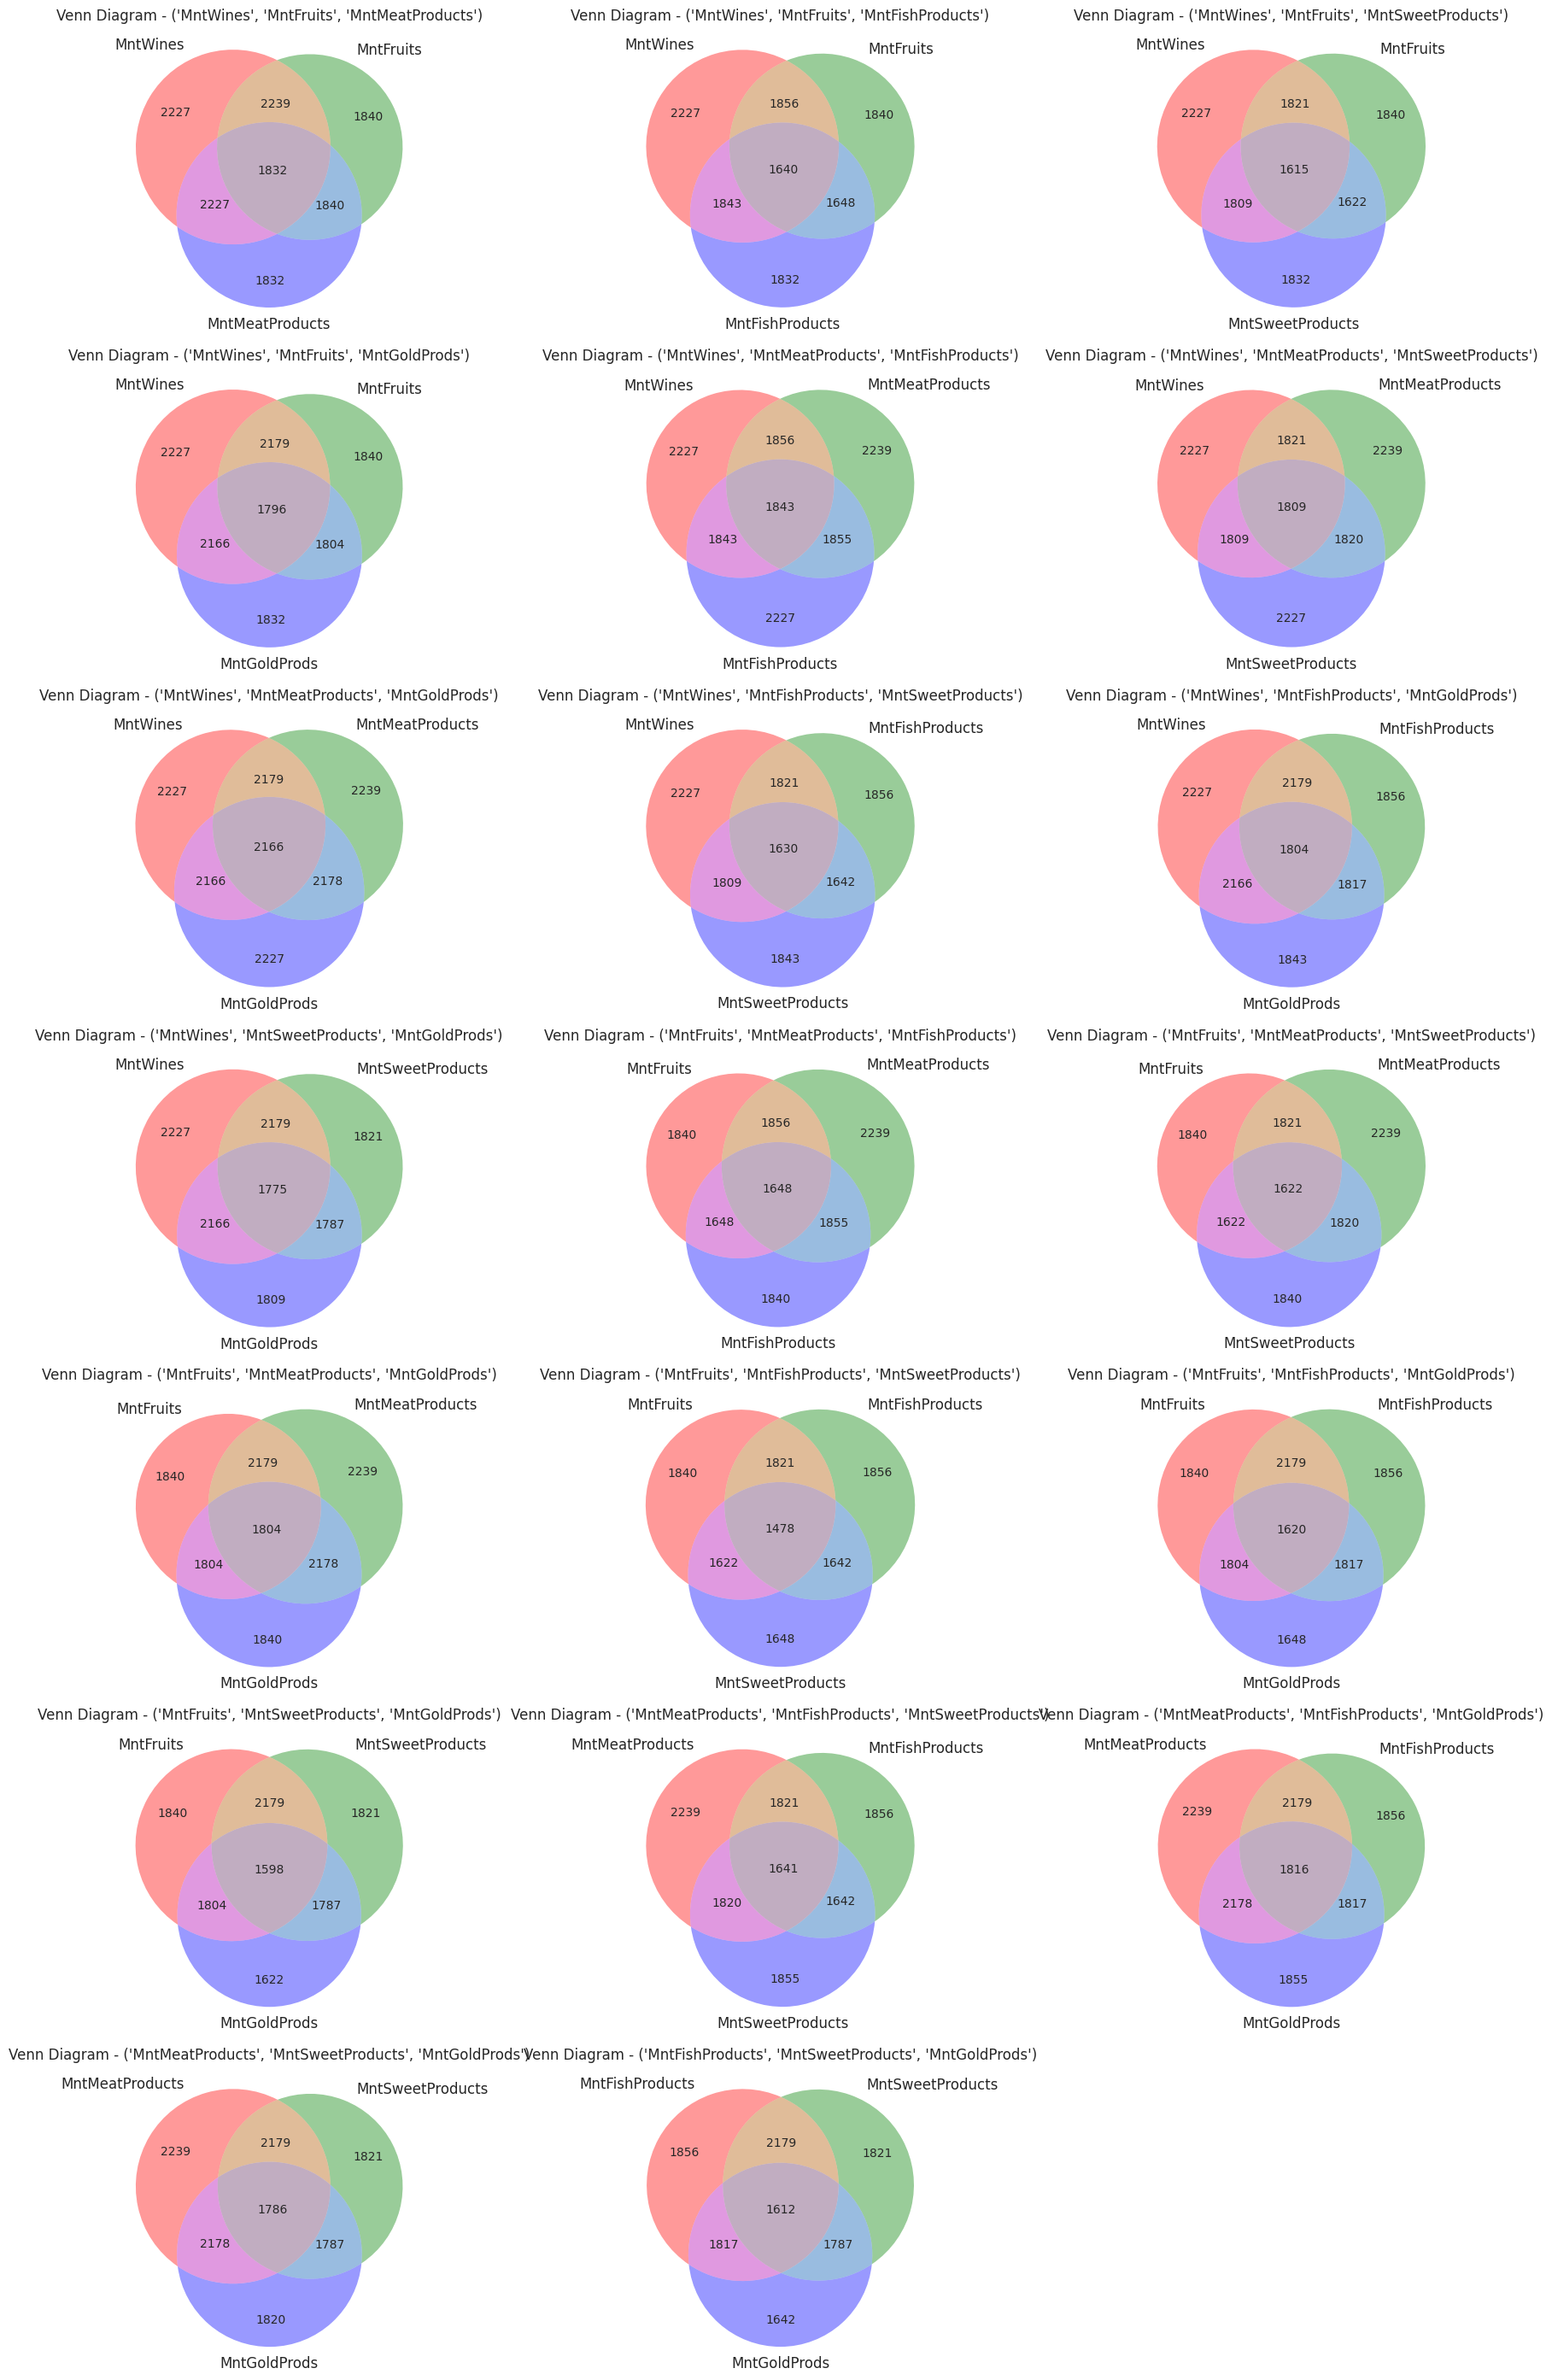

In [56]:
# Define the spending categories you want to consider for the Venn diagrams
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the number of combinations of three from the spending categories
num_combinations = len(list(combinations(spending_categories, 3)))

# Determine the grid size for subplots
rows = (num_combinations + 2) // 3

# Create subplots
fig, axs = plt.subplots(nrows=rows, ncols=3, figsize=(18, 4 * rows))
axs = axs.flatten()

# Iterate over all combinations of three categories
for i, combination in enumerate(combinations(spending_categories, 3)):
    
    # Creating sets of customers who purchased each category
    sets = {
        category: set(customers[customers[category] > 0]['ID'])
        for category in combination
    }

    # Prepare the subsets for the Venn diagram
    subset_sizes = []
    for j in range(1, len(combination) + 1):
        for comb in combinations(combination, j):
            subset = set.intersection(*(sets[cat] for cat in comb))
            subset_sizes.append(len(subset))

    # Plot the Venn diagram on the respective subplot
    venn3(subsets=subset_sizes[:7], set_labels=combination, ax=axs[i])
    axs[i].set_title(f'Venn Diagram - {combination}')

# Turn off unused axes if any
if len(axs) > i + 1:
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


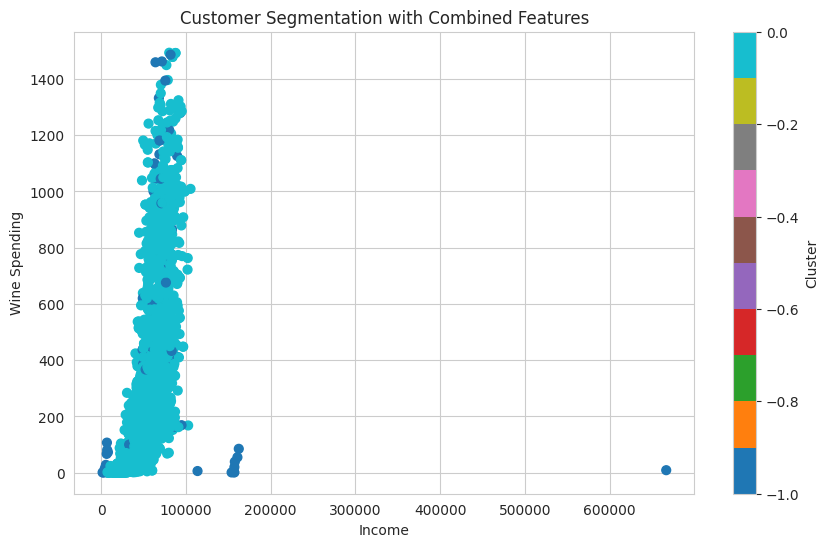

In [70]:
combined_features = [
    'Income',
    'MntWines',
    'MntGoldProds',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Recency',
    'Kidhome',
    'Teenhome'
]


# Step 1: Select combined features
X_combined = customers[combined_features].copy()

# Step 2: Handle missing values if any
X_combined['Income'] = X_combined['Income'].fillna(X_combined['Income'].mean())

# Step 3: Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Step 4: Apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan_combined = DBSCAN(eps=2.0, min_samples=5)  # start with eps=2.0 and tune
combined_labels = dbscan_combined.fit_predict(X_combined_scaled)

# Step 5: Save labels
customers['Combined_Cluster'] = combined_labels

# Step 6: Visualize basic projection
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(customers['Income'], customers['MntWines'], c=customers['Combined_Cluster'], cmap='tab10', s=40)
plt.title('Customer Segmentation with Combined Features')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.colorbar(label='Cluster')
plt.show()


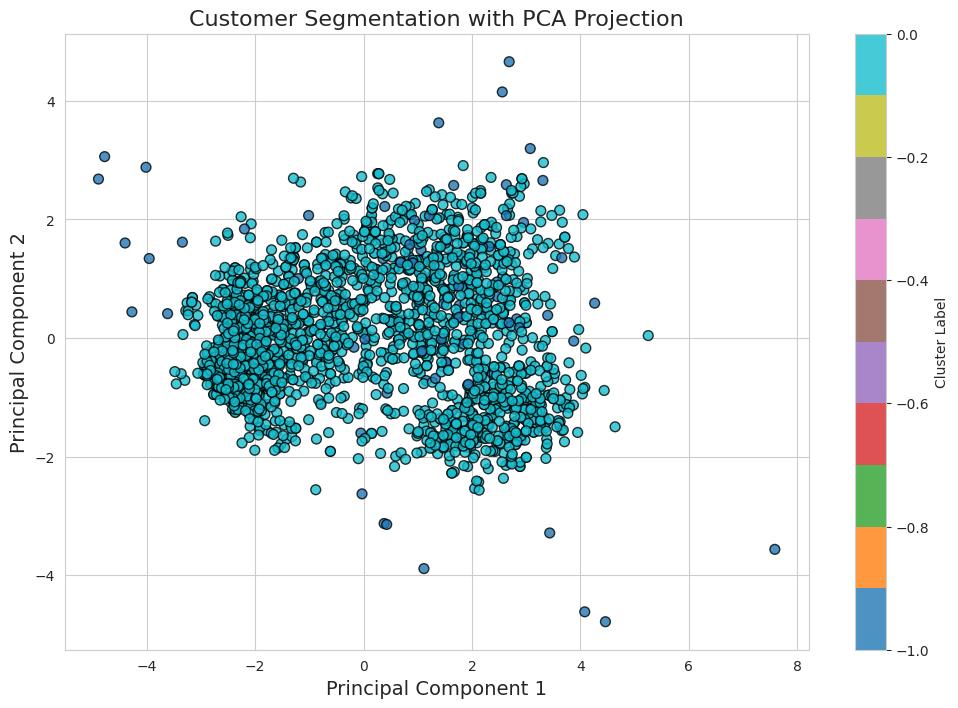

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Apply PCA to scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined_scaled)

# Step 2: Visualize PCA projection
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=customers['Combined_Cluster'], cmap='tab10', s=50, alpha=0.8, edgecolors='k')
plt.title('Customer Segmentation with PCA Projection', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


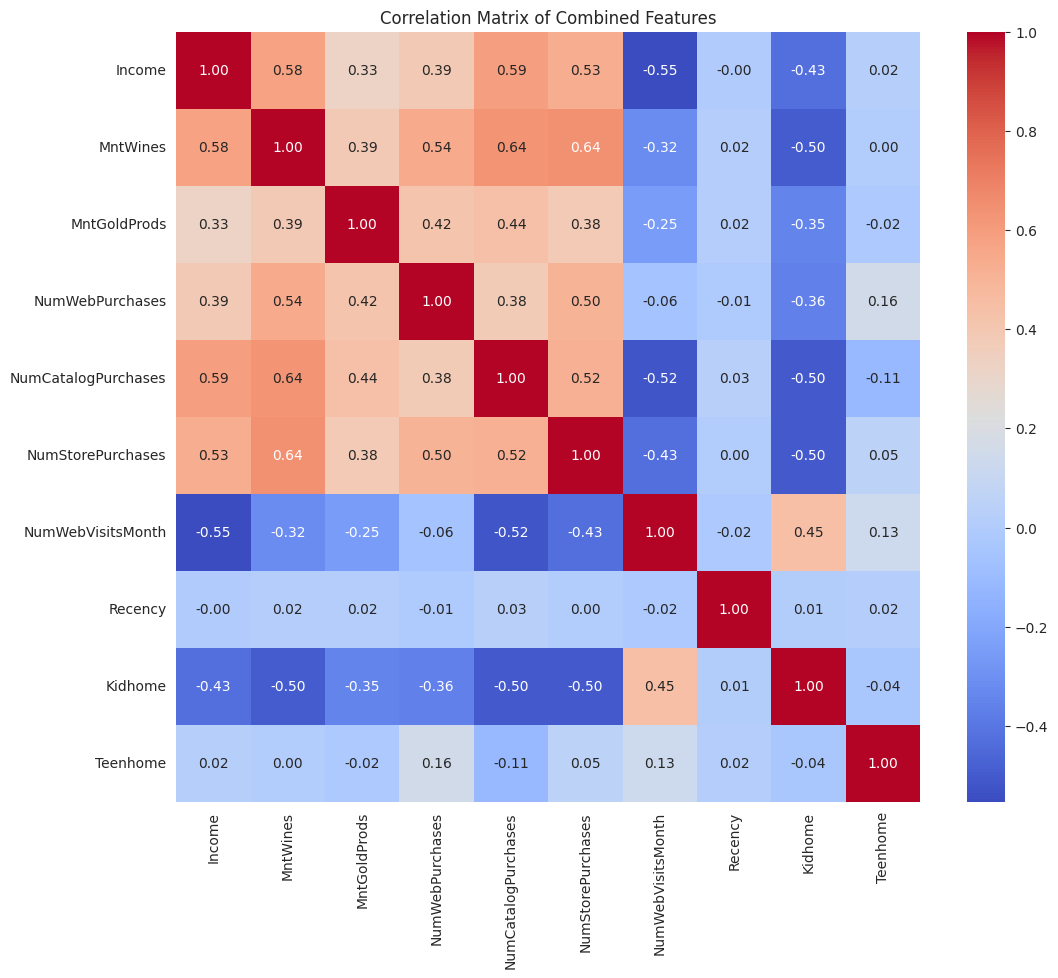

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation on combined features
correlation_matrix = customers[combined_features].corr()

# Plot correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Combined Features')
plt.show()


In [77]:
smart_features = [
    'Income',
    'MntWines',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebPurchases'
]

X_smart = customers[smart_features].copy()
from sklearn.preprocessing import StandardScaler

scaler_smart = StandardScaler()
X_smart_scaled = scaler_smart.fit_transform(X_smart)


In [78]:
from sklearn.cluster import DBSCAN

dbscan_smart = DBSCAN(eps=1.5, min_samples=5)
smart_labels = dbscan_smart.fit_predict(X_smart_scaled)

# Save labels
customers['SmartCluster'] = smart_labels


ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [79]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_smart = PCA(n_components=2)
X_smart_pca = pca_smart.fit_transform(X_smart_scaled)

plt.figure(figsize=(10,7))
plt.scatter(X_smart_pca[:,0], X_smart_pca[:,1], c=customers['SmartCluster'], cmap='tab10', s=40, edgecolors='k')
plt.title('Customer Clustering Using Smart Correlated Features (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Smart Cluster Label')
plt.show()



ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [68]:
scaler_sub = StandardScaler()
X_sub_scaled = scaler_sub.fit_transform(X_sub)

dbscan_sub = DBSCAN(eps=1.0, min_samples=5)  # You can tune eps smaller now
sub_labels = dbscan_sub.fit_predict(X_sub_scaled)

# Save new sub-cluster labels
main_cluster_customers['Sub_Engagement_Segment'] = sub_labels


/tmp/ipykernel_53557/1187668073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_customers['Sub_Engagement_Segment'] = sub_labels


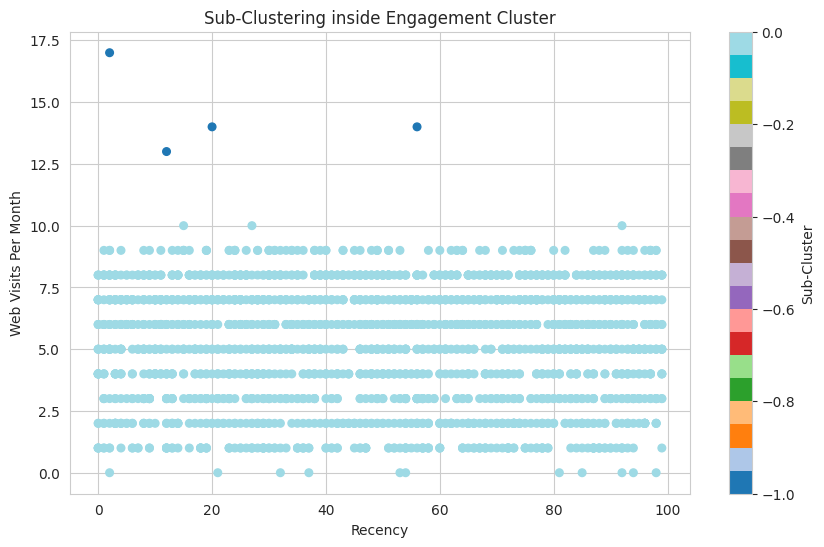

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(main_cluster_customers['Recency'], main_cluster_customers['NumWebVisitsMonth'], c=main_cluster_customers['Sub_Engagement_Segment'], cmap='tab20', s=30)
plt.title('Sub-Clustering inside Engagement Cluster')
plt.xlabel('Recency')
plt.ylabel('Web Visits Per Month')
plt.colorbar(label='Sub-Cluster')
plt.show()
